<H1 align="left"><B> Cancer Among Women</B><H1>

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
import pandas as pd

### Objective:-
<h4>
Cancer is one of among the worst disease’s which has affected the living kind and put on a challenge in terms of a cure! One out of every four deaths in the United States is from cancer. About 1.2 million Americans are diagnosed with cancer annually and more than 500,000 die of cancer annually.<br>
<br>
Analyzation of these data patterns will help us to determine the type of cancer that will more prevalently causing high rate of Death among the women. 

</h4>

In [11]:
csv = pd.DataFrame(pd.read_csv('cancer.csv'))

### Data Cleaning:-
##### By Treating null values as zerros we can avoiding completly removing the column or rows.

In [3]:
csv=csv.fillna(0)

### Data Adaptation:-
##### The data can be interpreted in many different ways,the below are some of the basic and essential one's to well comprehend the matter:-

#### 1) BY GENDER

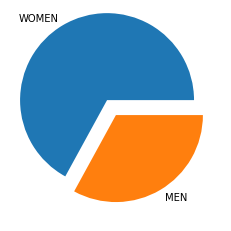

In [4]:
df=pd.DataFrame(csv.loc[:,['State','Total.Number','Total.Population','Total.Rate']])
df['Female.Rate']=((csv['Rates.Age and Sex.< 18.Female']+csv['Rates.Age and Sex.18 - 45.Female']
                    +csv['Rates.Age and Sex.45 - 64.Female']+csv['Rates.Age and Sex.> 64.Female'])/4)
df['Male.Rate']=(csv['Total.Rate']*2)-(df['Female.Rate'])
x = (df.loc[:,'Female.Rate']).sum()
y = (df.loc[:,'Male.Rate']).sum()
L = ["WOMEN","MEN"]
E = [0.2, 0]
z = np.array([x,y])
plt.pie(z,labels=L,explode=E)
plt.show()

#### 2) BY AGE GROUP

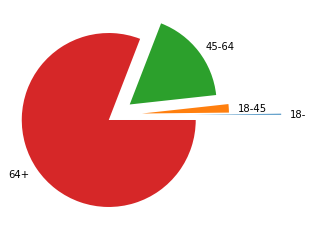

In [5]:
a = (csv.loc[:,'Rates.Age and Sex.< 18.Female']).sum()
b = (csv.loc[:,'Rates.Age and Sex.18 - 45.Female']).sum()
c = (csv.loc[:,'Rates.Age and Sex.45 - 64.Female']).sum()
d = (csv.loc[:,'Rates.Age and Sex.> 64.Female']).sum()
e = np.array([a,b,c,d])
L = ["18-","18-45","45-64","64+"]
E = [0.9,0.3,0.2,0.1]
plt.pie(e,labels=L,explode=E)
plt.show()

#### 3) BY TYPE

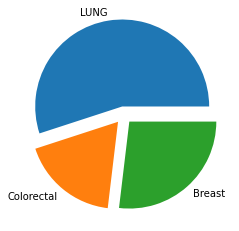

In [6]:
a = (csv.loc[:,'Types.Lung.Total'] ).sum()
b = (csv.loc[:,'Types.Colorectal.Total']).sum()
c = (csv.loc[:,'Types.Breast.Total']).sum()
e = np.array([a,b,c])
L = ["LUNG","Colorectal","Breast"]
E = [0.1,0.1,0.1]
plt.pie(e,labels=L,explode=E)
plt.show()

### MLR Models:-

### Creating models to determine the type of cancer impacting the higher rate of Death

#### 1) By Colarectal Cancer

In [7]:
x = csv[['Total.Rate','Types.Colorectal.Age and Sex.Female.18 - 44','Types.Colorectal.Age and Sex.Female.45 - 64',
         'Types.Colorectal.Age and Sex.Female.> 64']]
y = df['Female.Rate']
model_2 = linear_model.LinearRegression()
model_2.fit(x,y)
print("Intercepets = ",model_2.intercept_,"\nCoefficients = ",model_2.coef_,"\nR-squared-Value = ",model_2.score(x,y))

Intercepets =  100.14375381396701 
Coefficients =  [ 0.28975795 -0.64994578  1.09486042  1.0369969 ] 
R-squared-Value =  0.7471348052115918


#### 2) By Lung Cancer

In [8]:
x = csv[['Total.Rate','Types.Lung.Age and Sex.Female.18 - 44','Types.Lung.Age and Sex.Female.45 - 64',
         'Types.Lung.Age and Sex.Female.> 64']]
y = df['Female.Rate']
model_3 = linear_model.LinearRegression()
model_3.fit(x,y)
print("Intercepets = ",model_3.intercept_,"\nCoefficients = ",model_3.coef_,"\nR-squared-Value = ",model_3.score(x,y))

Intercepets =  132.0448943632008 
Coefficients =  [ 0.19004124 -2.20274179  0.46646606  0.30632273] 
R-squared-Value =  0.7837540910513154


#### 3) By Breast Cancer

In [9]:
x = csv[['Total.Rate','Types.Breast.Age.18 - 44','Types.Breast.Age.45 - 64','Types.Breast.Age.> 64']]
y = df['Female.Rate']
model_4 = linear_model.LinearRegression()
model_4.fit(x,y)
print("Intercepets = ",model_4.intercept_,"\nCoefficients = ",model_4.coef_,"\nR-squared-Value = ",model_4.score(x,y))

Intercepets =  49.84656958189933 
Coefficients =  [ 0.48209252  0.14632356 -0.00441779  1.10882882] 
R-squared-Value =  0.8242020051108307


### Results:-

<h4>
ABOVE WE HAVE CREATED THE LINEAR REGRESSION MODELS, WHERE WE TRY TO PREDICT VALUES BASED ON THE IMPACT OF BREAST,COLARECTAL & LUNG CANCER ON THE FEMATE DAETH RATE IN THREE DIFFERENT MODELS.:-<br><br>
    1) Model 2 = Mortality rate in Women due to Colorectal Cancer<br>
    2) Model 3 = Mortality rate in Women due to Lung Cancer<br>
    3) Model 4 = Mortality rate in Women due to Breast Cancer<br><BR>
MODEL 4 HAS THE HIGHEST R SQUARED VALUE OUT OF ALL , WHICH INDICATES THE PRESENCE AND INFLUENCE OF IT ON THE MORTALITY RATE AMONG WOMEN.<BR>
FURTHER MORE WE CAN DEVELOPE THESE MODELS TO ACCESS RACIAL DATA ALONG WITH ALREADY CONSIDERED AGE INFORMATION, THUS PECISING 
THE RESULTS FURTHERMORE.
</h4>